In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from sklearn.preprocessing import normalize


left = cv2.imread('data/l.png',cv2.IMREAD_COLOR)
right = cv2.imread('data/r.png',cv2.IMREAD_COLOR)

gt = cv2.imread('bad-match/gt.png',cv2.IMREAD_COLOR)

True

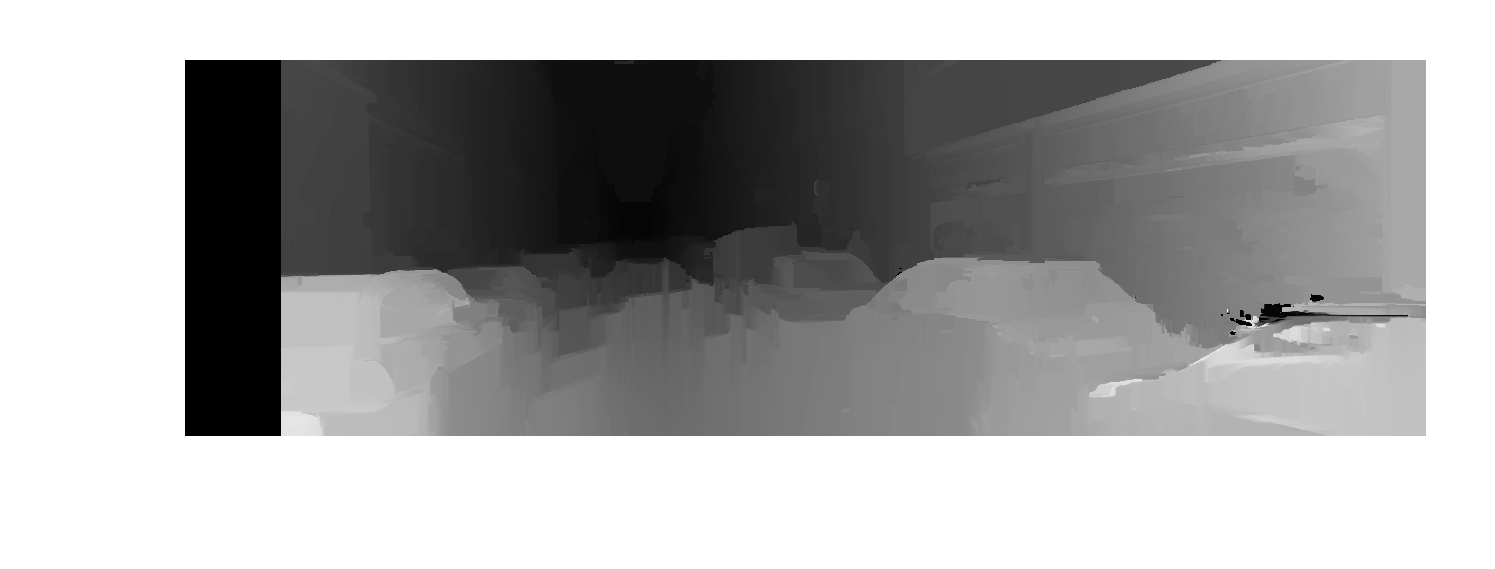

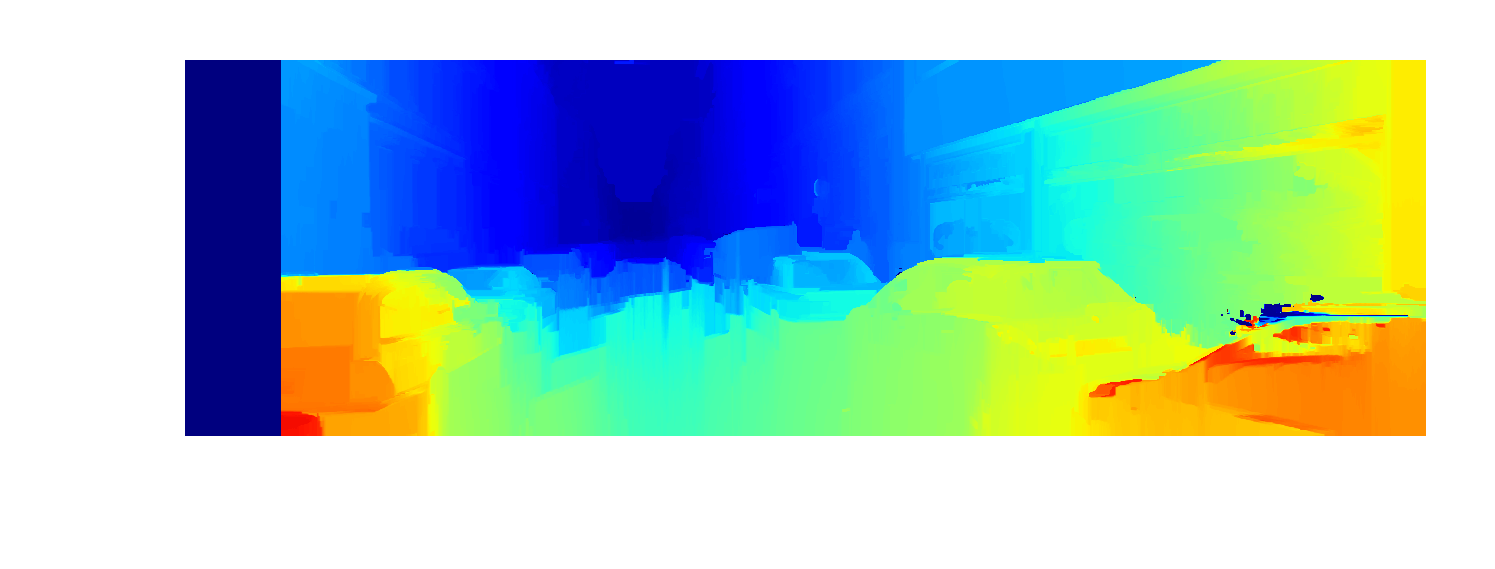

In [14]:
kernel_size = 3
smooth_left = cv2.GaussianBlur(left, (kernel_size,kernel_size), 1.5)
smooth_right = cv2.GaussianBlur(right, (kernel_size, kernel_size), 1.5)



window_size = 9    
left_matcher = cv2.StereoSGBM_create(
    numDisparities=96,
    blockSize=7,
    P1=8*3*window_size**2,
    P2=32*3*window_size**2,
    disp12MaxDiff=1,
    uniquenessRatio=16,
    speckleRange=2,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(80000)
wls_filter.setSigmaColor(1.2)

disparity_left = np.int16(left_matcher.compute(smooth_left, smooth_right))
disparity_right = np.int16(right_matcher.compute(smooth_right, smooth_left) )

wls_image = wls_filter.filter(disparity_left, smooth_left, None, disparity_right)
wls_image = cv2.normalize(src=wls_image, dst=wls_image, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
wls_image = np.uint8(wls_image)

fig = plt.figure(figsize=(wls_image.shape[1]/400, wls_image.shape[0]/400), dpi=400, frameon=False);
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(wls_image, cmap='gray')
fig = plt.figure(figsize=(wls_image.shape[1]/400, wls_image.shape[0]/400), dpi=400, frameon=False);
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(wls_image, cmap='jet')

cv2.imwrite('generated.png',wls_image)

In [3]:
print(wls_image)

[[  0   0   0 ... 168 168 168]
 [  0   0   0 ... 168 168 168]
 [  0   0   0 ... 168 168 168]
 ...
 [  0   0   0 ... 193 193 193]
 [  0   0   0 ... 193 193 193]
 [  0   0   0 ... 193 193 193]]


In [4]:
b = 0.54
f = 718.856

distance = (b*f)/(wls_image)
print(distance)

[[       inf        inf        inf ... 2.31060857 2.31060857 2.31060857]
 [       inf        inf        inf ... 2.31060857 2.31060857 2.31060857]
 [       inf        inf        inf ... 2.31060857 2.31060857 2.31060857]
 ...
 [       inf        inf        inf ... 2.01130694 2.01130694 2.01130694]
 [       inf        inf        inf ... 2.01130694 2.01130694 2.01130694]
 [       inf        inf        inf ... 2.01130694 2.01130694 2.01130694]]


/home/nirmal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [5]:
#first car, left
print(distance[324][133])
#black car, right
print(distance[310][850])
#silver car, far, right
print(distance[235][565])

1.9506645226130654
2.4883476923076926
4.361598202247191


In [18]:
print(distance[273][824])

2.4413977358490566


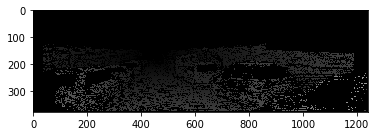

In [12]:
plt.imshow(gt, cmap='gray')